<a href="https://colab.research.google.com/github/alphoenixbiz/Deep-Learning-Tensorflow/blob/master/Autoencoders/Example%201/Normal(AutoEncoder)_Xente_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Honour Code
I Alfred, Maboa, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.utils import resample

In [0]:
train = pd.read_csv("gdrive/My Drive/Colab Notebooks/Zindi/Xente Fraud Detection Challenge/training.csv")
test = pd.read_csv("gdrive/My Drive/Colab Notebooks/Zindi/Xente Fraud Detection Challenge/test.csv")
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [0]:
y = train['FraudResult']
train.drop(['FraudResult'], axis=1, inplace=True)
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [0]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: FraudResult, dtype: int64

In [0]:
train_ID = train['TransactionId']
test_ID = test['TransactionId']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'AccountId', 'CustomerId', 'ProviderId', 'ProductId'], axis=1, inplace=True)
test.drop(['TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'AccountId', 'CustomerId', 'ProviderId', 'ProductId'], axis=1, inplace=True)

In [0]:
train.head()

,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
1,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
2,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
3,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
4,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [0]:
features = pd.concat([train, test],sort=False).reset_index(drop=True)
features.shape

(140681, 6)

In [0]:
D_features = pd.get_dummies(features, columns=["ProductCategory", 'ChannelId'])
D_features.head()

,Amount,Value,TransactionStartTime,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,2018-11-15T02:18:49Z,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-20.0,20,2018-11-15T02:19:08Z,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,500.0,500,2018-11-15T02:44:21Z,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20000.0,21800,2018-11-15T03:32:55Z,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,-644.0,644,2018-11-15T03:34:21Z,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
D_features['TransactionStartTime'] = pd.to_datetime(D_features['TransactionStartTime'])
D_features.head()

,Amount,Value,TransactionStartTime,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,2018-11-15 02:18:49+00:00,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,500.0,500,2018-11-15 02:44:21+00:00,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,-644.0,644,2018-11-15 03:34:21+00:00,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
D_features['TransactionStartTime'] = D_features['TransactionStartTime'].dt.hour #hour of the day
D_features.head()

,Amount,Value,TransactionStartTime,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,1000,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-20.0,20,2,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,500.0,500,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20000.0,21800,3,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,-644.0,644,3,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.utils import resample

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [0]:
# D_features['Time'] = StandardScaler().fit_transform(D_features['TransactionStartTime'].values.reshape(-1, 1))
# D_features['Amount'] = StandardScaler().fit_transform(D_features['Amount'].values.reshape(-1, 1))
# D_features.head()

In [0]:
# Spliting the data back to train(X,y) and test(X_sub)
X = D_features.iloc[:len(y), :]
X_test_final = D_features.iloc[len(y):, :]
print('Features size for train(X,y) and test(X_test):')
print('X', X.shape, 'y', y.shape, 'X_test_final', X_test_final.shape)

Features size for train(X,y) and test(X_test):
X (95662, 19) y (95662,) X_test_final (45019, 19)


In [0]:
# # UP sambling 
# # concatenate our training data back together
# X = pd.concat([X, y], axis=1)

# # separate minority and majority classes
# not_fraud = X[X.FraudResult==0]
# fraud = X[X.FraudResult==1]

# # upsample minority
# fraud_upsampled = resample(fraud,
#                           replace=True, # sample with replacement
#                           n_samples=len(not_fraud), # match number in majority class
#                           random_state=27) # reproducible results

# # combine majority and upsampled minority
# upsampled = pd.concat([not_fraud, fraud_upsampled])

# # check new class counts
# upsampled.FraudResult.value_counts()

# y2 = upsampled.FraudResult
# X0 = upsampled.drop('FraudResult', axis=1)


In [0]:
# We will create this situation by training our model on the normal transactions, only.
data = pd.concat([X, y], axis=1)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=27)
X_train = X_train[X_train.FraudResult == 0]
X_train = X_train.drop(['FraudResult'], axis=1)
y_test = X_test['FraudResult']
X_test = X_test.drop(['FraudResult'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(76374, 19)

In [0]:
# Build a Estimator
nb_epoch = 10
batch_size = 200
input_dim = X_train.shape[1] #num of columns, 30
encoding_dim = 40
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = layers.Input(shape=(input_dim, ))
encoder = layers.Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
decoder = layers.Dense(hidden_dim, activation='tanh')(encoder)
decoder = layers.Dense(input_dim, activation='relu')(decoder)
model = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

model.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')



model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1)

W0722 18:26:04.890261 139835478648704 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 76374 samples, validate on 19133 samples
Epoch 1/10
76374/76374 [==============================] - 2s 25us/sample - loss: 166949371.3425 - acc: 0.9379 - val_loss: 1484204873.9586 - val_acc: 0.9693
Epoch 2/10
76374/76374 [==============================] - 1s 15us/sample - loss: 166943718.1845 - acc: 0.9683 - val_loss: 1484197225.6256 - val_acc: 0.9692
Epoch 3/10
76374/76374 [==============================] - 1s 15us/sample - loss: 166938540.2408 - acc: 0.9683 - val_loss: 1484189634.5302 - val_acc: 0.9692
Epoch 4/10
76374/76374 [==============================] - 1s 15us/sample - loss: 166933430.2901 - acc: 0.9682 - val_loss: 1484182295.7746 - val_acc: 0.9692
Epoch 5/10
76374/76374 [==============================] - 1s 15us/sample - loss: 166928346.7805 - acc: 0.9683 - val_loss: 1484174682.9290 - val_acc: 0.9692
Epoch 6/10
76374/76374 [==============================] - 1s 15us/sample - loss: 166923255.0043 - acc: 0.9683 - val_loss: 1484167243.8842 - val_acc: 0.9692
Epoch 7/10
763

In [0]:
predictions = model.predict(X_test)
predictions

array([[75.48146   ,  0.        ,  0.        , ...,  0.98744833,
         0.        ,  0.        ],
       [ 0.        , 80.809326  , 12.565471  , ...,  0.        ,
         0.        ,  0.        ],
       [75.48146   ,  0.        ,  0.        , ...,  0.98744833,
         0.        ,  0.        ],
       ...,
       [75.48146   ,  0.        ,  0.        , ...,  0.98744833,
         0.        ,  0.        ],
       [75.48146   ,  0.        ,  0.        , ...,  0.98744833,
         0.        ,  0.        ],
       [75.48146   ,  0.        ,  0.        , ...,  0.98744833,
         0.        ,  0.        ]], dtype=float32)

In [0]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,1.913300e+04,19133.000000
mean,1.484138e+09,0.001986
std,8.317476e+10,0.044523
min,1.557327e+00,0.000000
25%,4.798279e+03,0.000000
50%,9.763303e+04,0.000000
75%,2.592156e+06,0.000000
max,1.025433e+13,1.000000


In [0]:
error_df.reconstruction_error.values

array([9.76296639e+04, 6.55771618e+07, 1.51483633e+09, ...,
       2.59215452e+06, 9.76248218e+04, 2.59215452e+06])

In [0]:
threshold = 2.6
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

In [0]:
y_pred[:5]

[1, 1, 1, 1, 1]

In [0]:
# performance matrics and model eveluation using sklearn.metrics inbuilt classification metric
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     19095
           1       0.00      1.00      0.00        38

    accuracy                           0.00     19133
   macro avg       0.50      0.50      0.00     19133
weighted avg       1.00      0.00      0.00     19133



**Final model**

In [0]:
# We will create this situation by training our model on the normal transactions, only.
data = pd.concat([X, y], axis=1)
X = data[data.FraudResult == 0]
y = X['FraudResult']
X = X.drop(['FraudResult'], axis=1)
X = X.values
X.shape

(95469, 19)

In [0]:
model.fit(X, X,
         epochs=nb_epoch,
         batch_size=batch_size,
         shuffle=True,
         verbose=1)

Epoch 1/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172950807.7999 - acc: 0.9733
Epoch 2/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172944500.1314 - acc: 0.9751
Epoch 3/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172938258.5088 - acc: 0.9756
Epoch 4/10
95469/95469 [==============================] - 1s 14us/sample - loss: 172932027.9480 - acc: 0.9761
Epoch 5/10
95469/95469 [==============================] - 1s 14us/sample - loss: 172925746.8891 - acc: 0.9763
Epoch 6/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172919499.7459 - acc: 0.9761
Epoch 7/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172913254.1373 - acc: 0.9764
Epoch 8/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172907050.7242 - acc: 0.9764
Epoch 9/10
95469/95469 [==============================] - 1s 13us/sample - loss: 172900844.4850 - acc: 0.9765
Epoch 10/1

In [0]:
predictions = model.predict(X_test_final.values)

In [0]:
len(X_test_final)

45019

In [0]:
mse = np.mean(np.power(X_test_final - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse})
error_df.describe()

,reconstruction_error
count,4.501900e+04
mean,9.750296e+08
std,6.958704e+10
min,1.256214e+00
25%,1.870907e+04
50%,1.323213e+05
75%,2.758156e+06
max,9.499836e+12


In [0]:
len(error_df)

45019

In [0]:
threshold = 2.6
y_predicted = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

In [0]:
y_predicted[:5]

[1, 1, 1, 1, 1]

[Text(0.5, 1.0, 'FraudResult')]

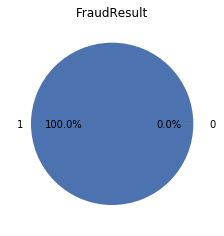

In [0]:
# Plot the accuracy for each classifier
f, ax = plt.subplots(figsize=(20, 10))
sns.set_color_codes(palette='deep')
plt.subplots_adjust(wspace = 0.5)
ax = plt.subplot(2, 4, 1)
plt.pie([sum(y_predicted), len(y_predicted) - sum(y_predicted)],labels = ['1', '0'],explode = (0, 0.1),autopct='%1.1f%%', colors=['b','orange'])
ax.set(title="FraudResult")

In [0]:
len(y_predicted)

45019

**Submission**

In [0]:
submission = pd.DataFrame({'TransactionId' : np.array(test_ID),'FraudResult' : y_predicted})

In [0]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,1
1,TransactionId_95109,1
2,TransactionId_47357,1
3,TransactionId_28185,1
4,TransactionId_22140,1


In [0]:
submission.to_csv("gdrive/My Drive/Colab Notebooks/Zindi/Xente Fraud Detection Challenge/new_submission.csv", index=False)